Try to get start with the Markov version of SIR.

We will have states of S,I,R: S for the number of susceptible, I for the number of infectious, and R for the number of recovered or deceased (or immune) individuals

Also, assume that one person is initialy in state I.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import cmath
import time
import sys




April 21:

Here we create four lists in which times, and numbers of S,I,R will be stored. We also initialize some initial balues for S,I,R. The graph won't make sense if we set I or R to be 1, so they are set to be 2. 

Now For the loop, which ends till running_time is larger than time_max. Notice that there could be a overflow over the time_max, but this is not important for the algorithm. The events of infection or recovery are assumed to happen according to a poisson process.


April 24:

make the whole thing as a function

April 28:

Added the periodic cos() term for infection rate.


In [38]:




def plotfigure(Total_Number,K,GAMMA,Time_max, Periodic):

    S_list = []
    I_list = []
    R_list = []


    #set our time 
    time_max = Time_max 

    #tracking index
    index = 0

    #virus spreading characteristic constants
    k = K
    gamma = GAMMA
    N = Total_Number

    S = N-1
    I = 1
    R = 0

    #time related variables, make lambda time different
    time = []
    running_time = 0
    arrival_time = 0
    xlambda = k*I*S/N + gamma*I

    print(xlambda)

    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)

    while running_time <time_max:
        
        #simulate event time using a random variable

        if I != 0:

########################################################################## Editted
            # Calculate rate at the top of the loop for clarity
            I_rate = k*I*S/N
            R_rate = gamma*I
            xlambda = I_rate + R_rate

########################################################################## Editted
            # You issues occured because your rate*timestep became larger than 1!
            # I checked this by running print(I_rate, (I_rate)/(I_rate+Rate)*arrival_time)
            p = random.random()

            arrival_time = -math.log(1.0 - p)/xlambda

            running_time = running_time + arrival_time

            time.append(running_time)

########################################################################## Editted           
            #What does this do??
            #periodic = math.cos(Periodic*running_time)


            a = random.random()

            #These seem redundant here!
            #I_rate = periodic*k*I*S/N
            # I_rate = k*I*S/N
            # R_rate = gamma*I
            
########################################################################## Editted
# The probability of an infection should just be I_rate/(I_rate+R_rate), no time dependence.
# This is mostly my fault for not catching it earlier! Sorry. I've never done MC using the arrival strategy
         #  if a < ((I_rate/(I_rate+R_rate))*(running_time-time[index])):

            if a < (I_rate/(I_rate+R_rate)):
                
                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
########################################################################## Editted
# You only need an else statement because you already calculated that *some* event happens                
         #  elif a>(1-(I_rate/(I_rate+R_rate))*(running_time-time[index])):
            else:

                R=R+1
                I=I-1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
                
            # else:
            #     print("else")
            #     S_list.append(S)
            #     I_list.append(I)
            #     R_list.append(R)
            #     index = index+1


        else:
            break
    
    plt.step(time,S_list,label="S")
    plt.step(time,I_list,label="I")
    plt.step(time,R_list,label="R")
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.suptitle('Markov SIR Model for US population', fontsize=20)
    plt.xlabel('time [days]', fontsize=18)
    plt.ylabel('Number of people', fontsize=18)
    plt.show()
    

0.2857142203832752


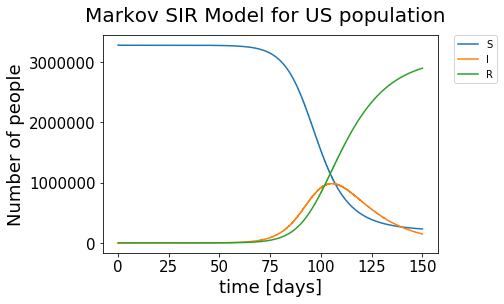

In [40]:


plotfigure(3280000,3/14,1/14,150,0)


In [18]:
def plotfigure_fixed(Total_Number,K,GAMMA,Time_max, Periodic):

    S_list = []
    I_list = []
    R_list = []


    #set our time 
    time_max = Time_max 

    #tracking index
    index = 0

    #virus spreading characteristic constants
    k = K
    gamma = GAMMA
    N = Total_Number

    S = N-1
    I = 1
    R = 0
    IC = 0

    #time related variables, make lambda time different
    time = []
    running_time = 0
    arrival_time = 0
    xlambda = k*I*S/N + gamma*I

    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)
    
    while running_time <time_max:
        
        #simulate event time using a random variable

        if I != 0:

            running_time = running_time + 1/(60*24)

            time.append(running_time)
            
            periodic = math.cos(Periodic*running_time)


            a = random.random()

            I_rate = periodic*k*I*S/N

            R_rate = gamma*I
            
            threshold_I = (I_rate/(I_rate+R_rate))
            
            if a < (threshold_I):
                
                
                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
                
            else:
                
                R = R+1
                I = I-1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
        else:
            break

    #plt.step(time,S_list,label="S")
    plt.step(time,I_list,label="I")
    #plt.step(time,R_list,label="R")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

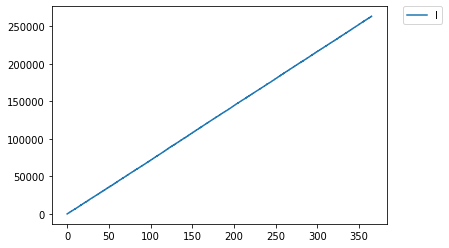

In [19]:
plotfigure_fixed(328000000,3/14,1/14,365,0)

In [6]:
def plotfigure_delay(Total_Number,K,GAMMA,Time_max, Periodic):

    S_list = []
    I_list = []
    R_list = []


    #set our time 
    time_max = Time_max 

    #tracking index
    index = 0

    #virus spreading characteristic constants
    k = K
    gamma = GAMMA
    N = Total_Number

    S = N-1
    I = 1
    R = 0

    #time related variables, make lambda time different
    time = []
    running_time = 0
    arrival_time = 0
    xlambda = k*I*S/N + gamma*I

    print(xlambda)

    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)
    
    #14 days time before I is turned into R
    count = 0 
    D = 0
    delay_time = []
    delay_count = []
    
    while running_time <time_max:
        
        #simulate event time using a random variable

        if I != 0:


            p = random.random()

            arrival_time = -math.log(1.0 - p)/xlambda

            running_time = running_time + arrival_time

            time.append(running_time)
            
            periodic = math.cos(Periodic*running_time)


            a = random.random()

            I_rate = periodic*k*(I+D)*S/N

            R_rate = gamma*I

            if a < ((I_rate/(I_rate+R_rate))*(running_time-time[index])):
                
                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
                
                D = D+1
                delay_time.append(running_time)
                delay_count.append(count)
            else:

                #R=R+1
                #I=I-1
                #D = D+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1

            xlambda = k*I*S/N + gamma*I
            
            #if (running_time-time[index]) >14:
             #   R = R+1
             #   I = I-1
              #  count = 0
        else:
            break

    #plt.step(time,S_list,label="S")
    plt.step(time,I_list,label="I")
    #plt.step(time,R_list,label="R")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

Now this is the loop, which ends till running_time is larger than time_max. Notice that there could be a overflow over the time_max, but this is not important for the algorithm. The events of infection or recovery are assumed to happen according to a poisson process.

3.9999999908536585


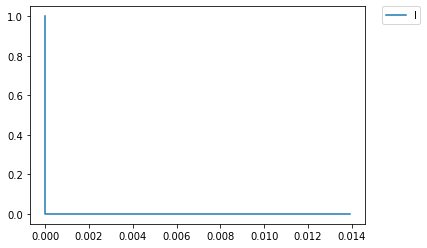

In [7]:
plotfigure(328000000,3,1,103,0)








April 24: 

Try to incoorporate Practical issues. 

1. Hospitalization means some degree of decrease of infected people's ability to spread the virus
2. Quarentine & vacine means decrease in S


Those two just means change of k and gamma, which is not so interesting nor dynamic.

Now I think of mutation, it's basically a new strain starting sometime after the original virus

In [8]:
def plotfigure2(Total_Number,K,GAMMA,Time_max):

    S_list = []
    I_list = []
    R_list = []
    
    S_list_2 = []
    I_list_2 = []
    R_list_2 = []
    


    #set our time 
    time_max = Time_max 

    #tracking index
    index = 0

    #virus spreading characteristic constants
    k = K
    gamma = GAMMA
    N = Total_Number
    
    k_2 = K
    gamma_2 = GAMMA

    S = N-1
    I = 1
    R = 0
    

    #time related variables, make lambda time different
    time = []
    time_2 = []
    running_time = 0
    arrival_time = 0
    xlambda = k*I*S/N + gamma*I


    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)
    
    S_list_2.append(S)
    I_list_2.append(I)
    R_list_2.append(R)
    time_2.append(0)


    while running_time <time_max:

        #simulate event time using a random variable

        if xlambda != 0:


            p = random.random()

            arrival_time = -math.log(1.0 - p)/xlambda

            running_time = running_time + arrival_time

            time.append(running_time)
            
            a = random.random()

            I_rate = k*I*S/N

            R_rate = gamma*I

            if a < ((I_rate/(I_rate+R_rate))*(running_time-time[index])):
                
                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
            else:

                R=R+1
                I=I-1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1

            xlambda = k*I*S/N + gamma*I
            
        if running_time <2000:
            
            S_2 = N-1
            I_2 = 1
            R_2 = 0
            S_list_2.append(S_2)
            I_list_2.append(I_2)
            R_list_2.append(R_2)
            time_2.append(running_time)
            running_time_2 = running_time
            
        else:
            
            xlambda_2 =k_2*I_2*S_2/N + gamma_2*I_2
            
            
            if xlambda_2 != 0:
                
                c = random.random()

                arrival_time_2 = -math.log(1.0 - c)/xlambda_2

                running_time_2 = running_time_2 + arrival_time_2

                time_2.append(running_time_2)

                I_rate_2 = k_2*I_2*S_2/N

                R_rate_2 = gamma_2*I_2

                c = random.random()

                arrival_time_2 = -math.log(1.0 - c)/xlambda_2

                running_time_2 = running_time_2 + arrival_time_2

                I_rate_2 = k_2*I_2*S_2/N

                R_rate_2 = gamma_2*I_2

                b = random.random()

                rate_2 = I_rate_2/(I_rate_2+R_rate_2)


                if b < rate_2*(running_time_2-time_2[index]):

                    S_2=S_2-1
                    I_2=I_2+1
                    S_list_2.append(S_2)
                    I_list_2.append(I_2)
                    R_list_2.append(R_2)

                else:

                    R_2=R_2+1
                    I_2=I_2-1
                    S_list_2.append(S_2)
                    I_list_2.append(I_2)
                    R_list_2.append(R_2)
                    
                    
            else: 
                
                S_list_2.append(S_2)
                I_list_2.append(I_2)
                R_list_2.append(R_2)


            
            


    sum_list = [a + b for a, b in zip(I_list, I_list_2)]
    
    #plt.step(time,S_list,label="S")
    plt.step(time,I_list,label="I")
    #plt.step(time,R_list,label="R")
    #plt.step(time,S_list_2,label="S_2")
    plt.step(time,I_list_2,label="I_2")
    #plt.step(time,R_list_2,label="R_2")
    plt.step(time,sum_list,label="I_sum")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

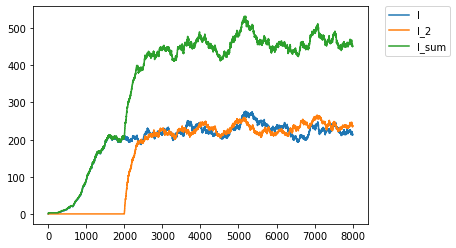

In [9]:
plotfigure2(100000,0.005,0.001,8000)




Now consider the effect of vacinations. It basicall reduces the amount of susceptible ammount of the population. The problem is the time point when the vacination is available and at what rate are people getting vacinnated.

It would also be very interesting to consider the effect of quarentine, because its really a hot topic. More generally, it's really the problem of fluidity of the infected people.

Incoorporating hospital quarentine into the model

In [10]:
def plotfigure_hospitalbed(Total_Number,K,GAMMA,Time_max, Periodic, max_hospital_bed):

    S_list = []
    I_list = []
    R_list = []


    #set our time 
    time_max = Time_max 

    #tracking index
    index = 0

    #virus spreading characteristic constants
    k = K
    gamma = GAMMA
    N = Total_Number

    S = N-1
    I = 1
    R = 0

    #time related variables, make lambda time different
    time = []
    running_time = 0
    arrival_time = 0
    xlambda = k*I*S/N + gamma*I
    
    #hospital bed
    bed = []
    bed.append(0)
    bed_count = 0

    #some initialization to prevent trivial results

    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    time.append(0)
    

    while running_time <time_max:

    #simulate event time using a random variable

        if xlambda != 0:


            p = random.random()

            arrival_time = -math.log(1.0 - p)/xlambda

            running_time = running_time + arrival_time

            time.append(running_time)

            periodic = math.cos(Periodic*running_time)


            a = random.random()

            I_rate = periodic*k*I*S/N

            R_rate = gamma*I

            if a < ((I_rate/(I_rate+R_rate))*(running_time-time[index])):

                S=S-1
                I=I+1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1
            else:

                R=R+1
                I=I-1
                S_list.append(S)
                I_list.append(I)
                R_list.append(R)
                index = index+1


        else:
            break


        xlambda = k*I*S/N + gamma*I
            
        if (bed_count<max_hospital_bed and I>100 and random.random()>0.05):

            bed_count = bed_count+1
            I = I-1
            bed.append(bed_count)
            #print(bed_count)
        elif (bed_count>1 and random.random()>0.9):
            bed_count = bed_count-1
            bed.append(bed_count)
            #print(bed_count)

        else:
            bed.append(bed_count)



    #plt.step(time,S_list,label="S")
    plt.step(time,I_list,label="I")
    #plt.step(time,R_list,label="R")
    plt.step(time,bed,label = "Bed")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

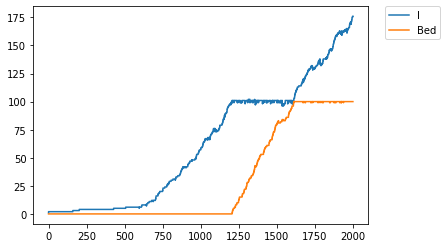

In [11]:
plotfigure_hospitalbed(1000,0.005,0.001,2000,0,100)




In [12]:
bed = []

bed_count = 0

max_hospital_bed = 100

I = 200

for i in range (0,100):
    
    if (bed_count<max_hospital_bed and I>100 and random.random()>0.05):

        bed_count = bed_count+1
        I = I-1
        bed.append(bed_count)
        print(bed_count)
    elif (bed_count>1 and random.random()>0.9):
        bed_count = bed_count-1
        bed.append(bed)
        print(bed_count)

    else:
        bed.append(bed_count)


print(bed)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 96, 97]
